In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

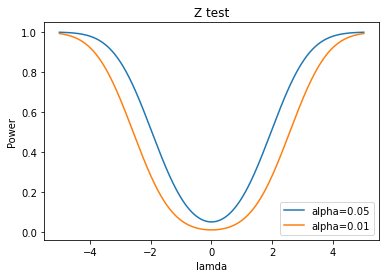

In [76]:
alpha = 0.05
alpha1 = 0.01
#Calculate C under different alpha
c=norm.ppf(1-alpha/2)
c1=norm.ppf(1-alpha1/2)

y=[]
y1=[]
#define lamda range and calculate corresponding phi
r = np.arange(-5,5.01,0.001)
for l in np.arange(-5,5.01,0.001):
    z = norm.cdf(l-c)+norm.cdf(-l-c)
    z1 = norm.cdf(l-c1)+norm.cdf(-l-c1)
    y.append(z)
    y1.append(z1)
    
#plot z test
plt.title('Z test')
plt.xlabel('lamda')
plt.ylabel('Power')
l1=plt.plot(r,y,label='alpha=0.05')
l2=plt.plot(r,y1,label='alpha=0.01')
plt.legend(loc='lower right')
plt.show()

<pre>The loss in power from using a smaller level for the test is very substantial for intermediate values of λ, but it gradually disappears as λ becomes larger.

In [3]:
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

In [77]:
#import earnings data
data_earnings = pd.read_csv('earnings-data.csv')
data_earnings.info()
data_earnings.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46302 entries, 0 to 46301
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    46302 non-null  float64
 1   age     46302 non-null  int64  
 2   ed1     46302 non-null  int64  
 3   ed2     46302 non-null  int64  
 4   ed3     46302 non-null  int64  
 5   ed4     46302 non-null  int64  
 6   ed5     46302 non-null  int64  
 7   year    46302 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.8 MB


,earn,age,ed1,ed2,ed3,ed4,ed5,year
1594,108.0,30,0,1,0,0,0,1992
28296,480.0,46,0,0,0,1,0,2007
13130,466.0,45,0,0,1,0,0,1999
8208,400.0,40,0,0,0,1,0,1996
4482,111.0,38,1,0,0,0,0,1994
19107,162.0,36,0,0,1,0,0,2002
28074,961.0,61,0,0,0,0,1,2006
3144,214.0,39,1,0,0,0,0,1993
18446,57.0,30,1,0,0,0,0,2001
31240,250.0,34,0,1,0,0,0,2008


In [78]:
#calculate log earnings,squared age, quared age/100
log_earn=np.log(data_earnings['earn'])
data_earnings.insert(0,'log_earn',log_earn)
sq_age=np.square(data_earnings['age'])
data_earnings.insert(0,'squared_age',sq_age)
a100=sq_age/100
data_earnings.insert(0,'a100',a100)

In [6]:
data_earnings.head()

,a100,squared_age,log_earn,earn,age,ed1,ed2,ed3,ed4,ed5,year
0,8.41,841,6.047372,423.0,29,0,0,0,1,0,1992
1,15.21,1521,5.971262,392.0,39,0,0,1,0,0,1992
2,9.00,900,6.030685,416.0,30,0,0,1,0,0,1992
3,24.01,2401,4.787492,120.0,49,0,0,0,1,0,1992
4,22.09,2209,6.396930,600.0,47,0,0,1,0,0,1992


In [79]:
#get year dummy variables 
yr_dummy=pd.get_dummies(data_earnings.year)

In [80]:
#concat dummy variables to earnings data
earnings = pd.concat([data_earnings,yr_dummy],axis=1)
earnings.head()

,a100,squared_age,log_earn,earn,age,ed1,ed2,ed3,ed4,ed5,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,8.41,841,6.047372,423.0,29,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15.21,1521,5.971262,392.0,39,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.00,900,6.030685,416.0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24.01,2401,4.787492,120.0,49,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,22.09,2209,6.396930,600.0,47,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#q1 part1
X= earnings[['age','a100','ed5','ed4','ed3','ed2','year']]
X1 = sm.add_constant(X)
Y = earnings['log_earn']
model = sm.OLS(Y,X1).fit()

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     2534.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:53:16   Log-Likelihood:                -46654.
No. Observations:               46302   AIC:                         9.332e+04
Df Residuals:                   46294   BIC:                         9.339e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.7354      0.904    -46.168      0.0

Regress the log of earnings on a constant, age, age2/100, the four highest education dummies,
and year. What was the effect of dividing age2 by 100? Why was this a sensible
thing to do?

Answer to Q1:<pre>By dividing age2 by 100, the rest properties are the same. It can make the results readable and clear.

In [84]:
#q2
X2= earnings.drop(['log_earn','ed1','squared_age','earn',1992],axis=1)
X2 = sm.add_constant(X2)
Y1 = earnings['log_earn']
model2 = sm.OLS(Y1,X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     618.7
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:43:35   Log-Likelihood:                -46576.
No. Observations:               46302   AIC:                         9.321e+04
Df Residuals:                   46272   BIC:                         9.347e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0429      0.002    -19.841      0.0

How many can you add? Does it matter which ones you add? Do the coefficient and standard errors suggest
that these regressors are needed?

<pre>I can add (number of year dummy variables -1) to the regression. It does not matter which ones I add, they can give the same explanatory power of the model. P values suggest that year 1993-1997 is insignificant in the model, this may because some variables are correlated with each other. 

In [85]:
#Q3
from statsmodels.stats.anova import anova_lm
anova_lm(model,model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,46294.0,20338.741597,0.0,NaN,NaN,NaN
1,46272.0,20270.117193,22.0,68.624403,7.120622,2.915092e-22


Test the hypothesis that the coefficients on these year dummy variables are all equal to
zero.

<pre> According to the F test results (Pr<1%), we can reject H null, and get the conclusion that year dummy variables are not all equal to zero.

In [86]:
#Q4
X4= earnings.drop(['log_earn','ed1','squared_age','earn','year'],axis=1)
Y3 = earnings['log_earn']
model4 = sm.OLS(Y3,X4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     618.7
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:49:52   Log-Likelihood:                -46576.
No. Observations:               46302   AIC:                         9.321e+04
Df Residuals:                   46272   BIC:                         9.347e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a100          -0.0548      0.003    -19.556      0.0

Run a regression that has exactly the same explanatory power as the regression in part(2) but which does not contain a constant term and does not include the year variable.
Explain the relationship between the coefficients on the variable y15 in the two regressions.

<pre> With constant term and year variable in the regression, the coefficient of y15 is smaller and the std is smaller. If we use the model without constant term and year variable, we may have under specification problem.

In [87]:
#Q5
#Generate ed difference
ed_diff=earnings['ed5']-earnings['ed4']
earnings.insert(0,'ed_diff',ed_diff)

In [15]:
earnings.head()

,ed_diff,a100,squared_age,log_earn,earn,age,ed1,ed2,ed3,ed4,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,-1,8.41,841,6.047372,423.0,29,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,15.21,1521,5.971262,392.0,39,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9.00,900,6.030685,416.0,30,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-1,24.01,2401,4.787492,120.0,49,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,22.09,2209,6.396930,600.0,47,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
#Run the regression
X5= earnings.drop(['log_earn','ed4','ed5','squared_age','earn',],axis=1)
X5=sm.add_constant(X5)
Y4 = earnings['log_earn']
model5 = sm.OLS(Y4,X5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     618.7
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:10:42   Log-Likelihood:                -46576.
No. Observations:               46302   AIC:                         9.321e+04
Df Residuals:                   46272   BIC:                         9.347e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.000    -45.089      0.0

Reformulate the regression of part (2) so that one of the coefficients measures the change in
log earnings from obtaining a postgraduate degree. Test the hypothesis that this difference
is 0.20.

<pre> t=(0.1234-0.2)/0.006=-12.77,accept H0, the difference is 0.02

In [17]:
#Q6
earnings.insert(0,'age35',np.nan)
earnings.insert(0,'age60',np.nan)
for i in range(0,len(earnings.index),1):
    if earnings.iloc[i,7] >= 60:
        earnings.iloc[i,0] = 1
        earnings.iloc[i,1] = 0
    else:
        earnings.iloc[i,0] = 0
        if earnings.iloc[i,7] <= 35:
            earnings.iloc[i,1] = 1
        else:
            earnings.iloc[i,1] = 0

In [18]:
earnings.head()

,age60,age35,ed_diff,a100,squared_age,log_earn,earn,age,ed1,ed2,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0.0,1.0,-1,8.41,841,6.047372,423.0,29,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0,15.21,1521,5.971262,392.0,39,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,0,9.00,900,6.030685,416.0,30,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,-1,24.01,2401,4.787492,120.0,49,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0,22.09,2209,6.396930,600.0,47,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X6= earnings.drop(['log_earn','ed1','earn','1992','squared_age','ed_diff','year'],axis=1)
X6=sm.add_constant(X6)
Y5 = earnings['log_earn']
model6 = sm.OLS(Y5,X6).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     579.3
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:23:07   Log-Likelihood:                -46570.
No. Observations:               46302   AIC:                         9.320e+04
Df Residuals:                   46270   BIC:                         9.348e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0827      0.097     42.216      0.0

In [91]:
#F test
anova_lm(model2,model6)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,46272.0,20270.117193,0.0,NaN,NaN,NaN
1,46270.0,20264.926223,2.0,5.19097,5.926155,0.002671


In [92]:
#Wald test
#hypothesis:H0:age<=35,age>=60 jointly equals zero
hypothesis_0 = '(age60 = 0,age35 = 0)'
wald_0 = model6.wald_test(hypothesis_0)
print(wald_0)

<F test: F=array([[5.92615534]]), p=0.0026707486309530703, df_denom=4.63e+04, df_num=2>


/Users/ceciliah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


Create two dummy variables, young and old. The first of these is 1 if age ≤ 35, and the
second is 1 if age ≥ 60. Add the two dummies to the regression and perform both an F test
and a Wald test of the hypothesis that neither of them actually belongs in the regression.
Report p values for both tests. How do you interpret the results of these tests?

<pre>Wald test and F test show the same result that P value is approximately 0.0027<1%,reject H0. So we can get the conclusion that they both belong to the regression.

In [94]:
#Q7
earnings.columns=earnings.columns.map(str)
X7= earnings.drop(['log_earn','ed_diff','ed1','earn','1992','squared_age','year'],axis=1)
X7=sm.add_constant(X7)
Y6 = earnings['log_earn']
model7 = sm.OLS(Y6,X7).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     618.7
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:15:06   Log-Likelihood:                -46576.
No. Observations:               46302   AIC:                         9.321e+04
Df Residuals:                   46272   BIC:                         9.347e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1742      0.053     78.318      0.0

In [58]:
hypo ='(age = -a100)'
model7.wald_test(hypo)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.73682001]]), p=0.39068589557169053, df_denom=4.63e+04, df_num=1>

The regression implies that the expectation of log earnings first increases and then decreases
with age. At what age is this expectation maximized? Test the hypothesis that the age at
which it is maximized is actually 50.

<pre>P value=0.39>1%,we cannot reject H0, so age at which it is maximized is actually 50.